# Examples of different distributions, typical usa case and data type
## Descrete
### 1. Binomial (Bernoulli)


## Continuous
### 1. Poison

### 2. Exponential

### 3. Weibul

### 4. Normal (Gaussian)

### 5. t-Distribution



In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import nbinom, probplot
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
import sympy
from sympy.abc import x, z

In [2]:
# Binomial distribution with parameters n and p 
# is the discrete probability distribution of the number 
# of successes in a sequence of n independent experiments.
# p = 1, 1-p = 0
# wiki: https://en.wikipedia.org/wiki/Binomial_distribution
def dice_roll(size):
    """ roll the d6, duh! """
    result = []
    for _ in range(size):
        result.append(random.randint(1,6))
    return result

rolls = dice_roll(10000)
rolls_df = pd.DataFrame({'dice_roll':rolls})
rolls_df.head(5)

,dice_roll
0,2
1,6
2,1
3,1
4,4


In [3]:
# Frequency table:
n_bins = 10
d = {}
value_mapper = {1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:0, 8:0, 9:0, 10:0}
for i in range(1, n_bins+1):
    d[i] = rolls.count(i)
data = {'bin_number': [i for i in range(1, n_bins+1)], 
        'value': [value_mapper[i] for i in range(1, n_bins+1)],
        'count': [d[i] for i in range(1, n_bins+1)]}
df = pd.DataFrame.from_dict(data)
df.head(10)

,bin_number,value,count
0,1,1,1653
1,2,2,1727
2,3,3,1630
3,4,4,1675
4,5,5,1664
5,6,6,1651
6,7,0,0
7,8,0,0
8,9,0,0
9,10,0,0


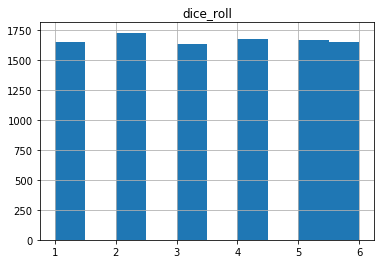

In [4]:
# Histogram -> does it make sense here?
hist = rolls_df.hist(bins=n_bins)

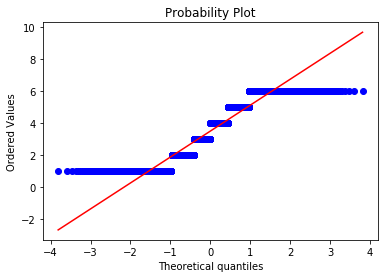

In [8]:
# QQplot or probplot. it's a weird looking one, since it is a descrete distribution
ax1 = plt.subplot()
chart = stats.probplot(rolls, plot=plt)

In [81]:
# Normal Distribution (Bell curve, Gaussian) -> Nope+) Example to detect what is this
normal_df = pd.read_csv('data/100m.csv')
normal_df['Result'] = normal_df['Result'].mask(normal_df['Result'].eq('None')).dropna()
normal_df = normal_df[pd.notnull(normal_df['Result'])]
normal_df['Result'] = normal_df['Result'].apply(lambda x: np.log(float(x)+1))
normal_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,100M Men,Rio,2016,G,Usain BOLT,JAM,2.380472
1,M,100M Men,Rio,2016,S,Justin GATLIN,USA,2.387845
2,M,100M Men,Rio,2016,B,Andre DE GRASSE,CAN,2.389680
3,M,100M Men,Beijing,2008,G,Usain BOLT,JAM,2.369309
4,M,100M Men,Beijing,2008,S,Richard THOMPSON,TTO,2.387845


In [82]:
# Frequency table
n_bins = 50
def compute_bins(n_bins, input_df, target_column):
    """ compute the data slices for every bin """
    d = {}
    step = max(input_df[target_column]) / n_bins
    for i in range(n_bins+1):
        d[i+1] = (round(i*step, 2), round((i+1)*step, 2))
    return d

def in_range(inp, range):
    """ helper float comparison """
    return inp >= range[0] and inp < range[1]

value_mapper = compute_bins(n_bins, normal_df[normal_df['Gender'] == 'M'], 'Result')
count = []
for i in range(1, n_bins+1):
    count.append(normal_df['Result'][normal_df['Result'].apply(lambda x: in_range(x, value_mapper[i]))].count())
data = {'bin_number': [i for i in range(1, n_bins+1)], 
        'value': [value_mapper[i] for i in range(1, n_bins+1)],
        'count': count}
df = pd.DataFrame.from_dict(data)
df.tail(10)

,bin_number,value,count
40,41,"(2.09, 2.14)",0
41,42,"(2.14, 2.19)",0
42,43,"(2.19, 2.24)",0
43,44,"(2.24, 2.3)",0
44,45,"(2.3, 2.35)",0
45,46,"(2.35, 2.4)",24
46,47,"(2.4, 2.45)",31
47,48,"(2.45, 2.51)",60
48,49,"(2.51, 2.56)",15
49,50,"(2.56, 2.61)",6


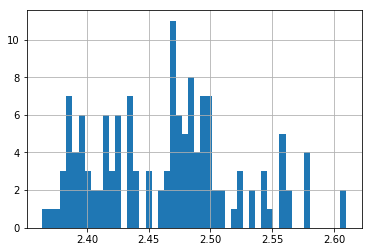

In [83]:
# Histogram -> does it make sense here?
hist = normal_df['Result'].hist(bins=n_bins)

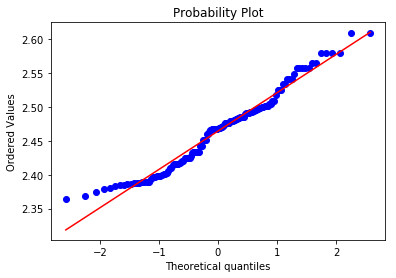

In [84]:
# QQplot or probplot. it's a weird looking one, since it is a descrete distribution
ax1 = plt.subplot()
chart = stats.probplot(normal_df['Result'], plot=plt)